In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
data=pd.read_csv("delivery_time.csv")
print("Data imported successfully!!!!!")

Data imported successfully!!!!!


In [28]:
data

Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5

In [4]:
data.shape

(21, 2)

In [5]:
data.describe()

Delivery Time  Sorting Time
count      21.000000     21.000000
mean       16.790952      6.190476
std         5.074901      2.542028
min         8.000000      2.000000
25%        13.500000      4.000000
50%        17.830000      6.000000
75%        19.750000      8.000000
max        29.000000     10.000000

In [6]:
import pandas_profiling

In [7]:
profile = data.profile_report(title='Profile Report')

In [8]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
data.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x22501e965e0>,
 'caps': [<matplotlib.lines.Line2D at 0x22501e969d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22501796df0>],
 'medians': [<matplotlib.lines.Line2D at 0x225017765b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22501776910>],
 'means': []}

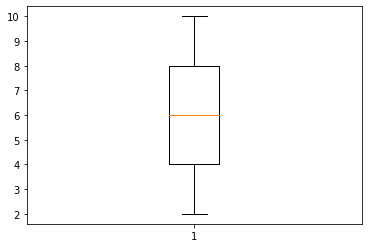

In [30]:
plt.boxplot(data['Sorting Time'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

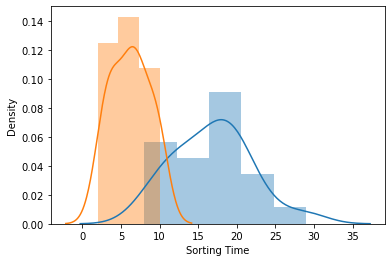

In [31]:
sns.distplot(data['Delivery Time'])
sns.distplot(data['Sorting Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

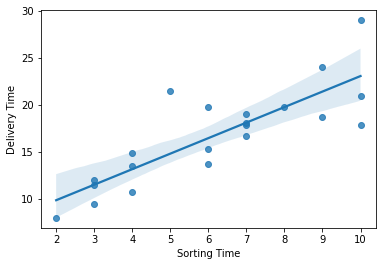

In [32]:
sns.regplot(x="Sorting Time", y="Delivery Time", data = data)

In [33]:
import statsmodels.formula.api as smf

In [34]:
data.head(2)

Delivery Time  Sorting Time
0           21.0            10
1           13.5             4

In [35]:
data=data.rename(columns={"Delivery Time":"dt","Sorting Time":"st"})

In [36]:
data

dt  st
0   21.00  10
1   13.50   4
2   19.75   6
3   24.00   9
4   29.00  10
5   15.35   6
6   19.00   7
7    9.50   3
8   17.90  10
9   18.75   9
10  19.83   8
11  10.75   4
12  16.68   7
13  11.50   3
14  12.03   3
15  14.88   4
16  13.75   6
17  18.11   7
18   8.00   2
19  17.83   7
20  21.50   5

In [39]:
reg=smf.ols("dt~st",data=data).fit()
reg

In [40]:
print(reg.params)
print(reg.tvalues)
print(reg.pvalues)

Intercept    6.582734
st           1.649020
dtype: float64
Intercept    3.823349
st           6.387447
dtype: float64
Intercept    0.001147
st           0.000004
dtype: float64


In [41]:
(reg.rsquared,reg.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [42]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        19:15:11   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
residual=reg.resid
residual

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [45]:
residual.mean()

-6.767073673905716e-16

In [51]:
data["log_st"]=np.log(data["st"])
reg_log = smf.ols("dt~log_st",data=data).fit()  # Regression using logarthmic transformation
print(reg_log.params)
print(reg_log.tvalues)
print(reg_log.pvalues)
print((reg_log.rsquared,reg_log.rsquared_adj))
print(reg_log.summary())
residual=reg_log.resid
print(residual.mean())

Intercept    1.159684
log_st       9.043413
dtype: float64
Intercept    0.472460
log_st       6.586789
dtype: float64
Intercept    0.641980
log_st       0.000003
dtype: float64
(0.6954434611324223, 0.6794141696130761)
                            OLS Regression Results                            
Dep. Variable:                     dt   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           2.64e-06
Time:                        19:27:53   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                  

In [56]:
# Exponential model 
data["reg_exp"] = np.log(data["dt"])
reg_exp = smf.ols("reg_exp~st",data=data).fit() # regression using Exponential model
print(reg_exp.params)
print(reg_exp.tvalues)
print(reg_exp.pvalues)
print((reg_exp.rsquared,reg_exp.rsquared_adj))
print(reg_exp.summary())
residual=reg_exp.resid
print(residual.mean())

Intercept    2.121372
st           0.105552
dtype: float64
Intercept    20.601357
st            6.836088
dtype: float64
Intercept    1.857343e-14
st           1.592708e-06
dtype: float64
(0.7109478980584187, 0.6957346295351776)
                            OLS Regression Results                            
Dep. Variable:                reg_exp   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           1.59e-06
Time:                        19:31:20   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                        

In [58]:
data["st_square"]=data["st"]*2
quad_mod  = smf.ols("dt~st_square",data=data).fit() # regression using Quadratic modell
print(quad_mod.params)
print(quad_mod.tvalues)
print(quad_mod.pvalues)
print((quad_mod.rsquared,quad_mod.rsquared_adj))
print(quad_mod.summary())
residual=quad_mod.resid
print(residual.mean())

Intercept    6.582734
st_square    0.824510
dtype: float64
Intercept    3.823349
st_square    6.387447
dtype: float64
Intercept    0.001147
st_square    0.000004
dtype: float64
(0.6822714748417231, 0.6655489208860244)
                            OLS Regression Results                            
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        19:34:24   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                  